# Introduction

This study provides a comprehensive analysis of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It delves into the factors contributing to these accidents and their impact on fatalities in the region. Focusing on North Rhine-Westphalia, the research aims to uncover patterns and potential causal links between traffic incidents and deaths. The goal is to offer insights into the effectiveness of traffic safety measures, understand accident and mortality trends, and propose strategies to reduce the occurrence and severity of road accidents. Ultimately, this study aims to enhance traffic safety and save lives in North Rhine-Westphalia by informing practical and effective safety intervention

## DataSources

Here is a short listing of datasources

Datasource1 : Number of accidents by location - Country - Month

Link : https://www.govdata.de/ckan/dataset/anzahl-der-unfalle-nach-ortslage-land-monat.rdf

Datasource2 : Deaths by sex and selected causes of death (84) - independent cities and districts - year

Link : https://www.govdata.de/ckan/dataset/gestorbene-nach-geschlecht-und-ausgewahltentodesursachen-84-kreisfreie-stadte-und-kreise-jahr.rdf

## Data Pipeline

Data Loading: Both the datasets were imported in Python using Pandas allowing to manipulation the data easily in a Python environment

Data Cleaning: The datasets were cleaned by using Pandas functions such as Dropna, Duplicated, etc. which helped in handling missing values removing duplicates, and correcting inconsistent data.

Data Transformation: Certain fields were transformed such as cleaning the inconsistent data in the field Online_order and Book_Table which helped in statistical analysis and visualization



## Results 





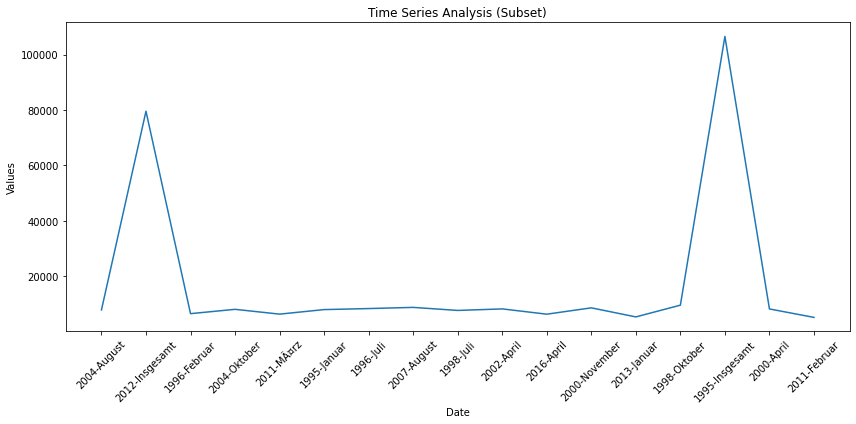

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset here
# Remember to replace the file path with the correct path to your dataset
data2 = pd.read_csv(r'C:\Users\91957\Prathamesh Dataset\cleaned_dataset2.csv', delimiter=';')

# Convert columns to appropriate data types
data2.iloc[:, 2:] = data2.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Filling NaN values with the mean of each column
data2_filled = data2.fillna(data2.mean())

# Select a random subset of 10-20 rows for the time series analysis
subset_size = np.random.randint(10, min(21, len(data2_filled) + 1))
data2_subset = data2_filled.sample(n=subset_size)

# Generating a combined year-month string for plotting
data2_subset['Date'] = data2_subset.iloc[:, 0].astype(str) + '-' + data2_subset.iloc[:, 1].astype(str)

# Plotting the time series for the subset
plt.figure(figsize=(12, 6))
plt.plot(data2_subset['Date'], data2_subset.iloc[:, 2])
plt.xticks(rotation=45)
plt.title('Time Series Analysis (Subset)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


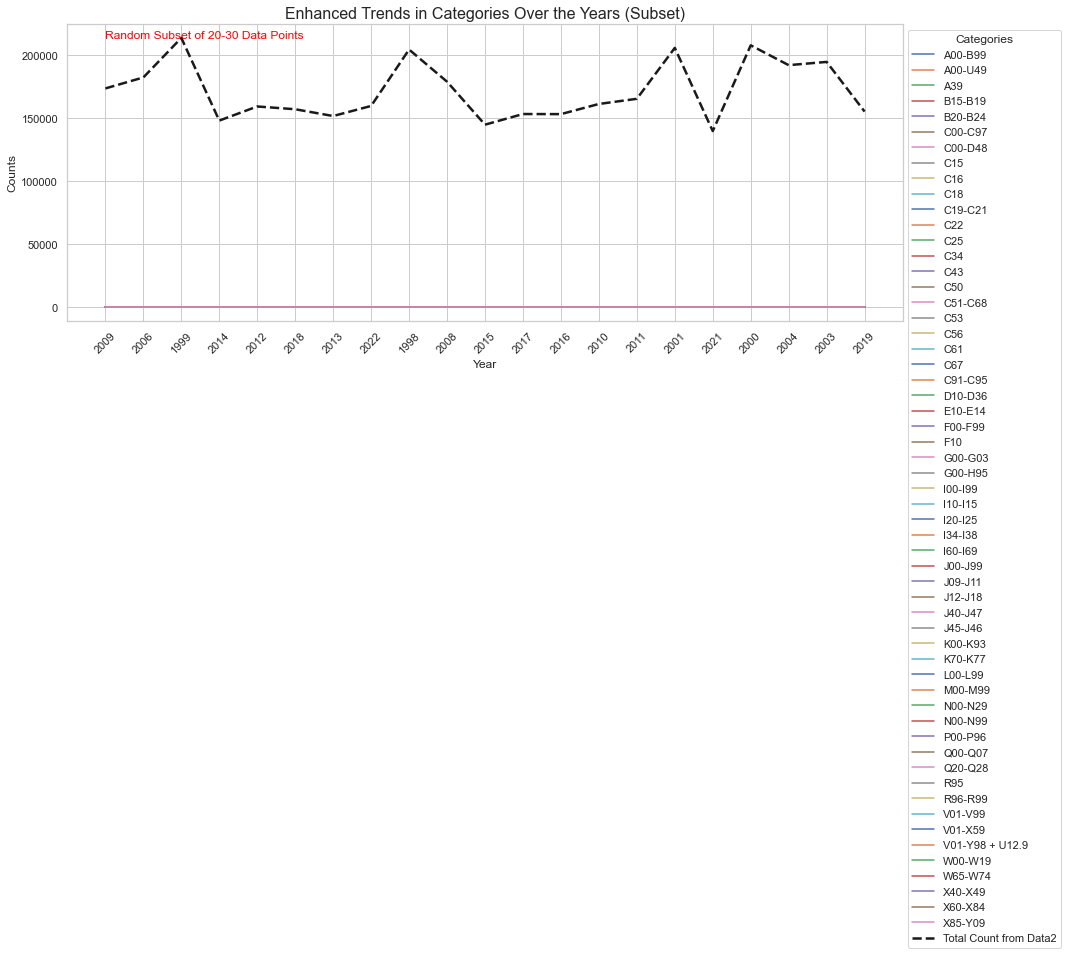

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare your datasets here
data1 = pd.read_csv(r'C:\Users\91957\Prathamesh Dataset\cleaned_dataset1.csv', delimiter=';')
data2 = pd.read_csv(r'C:\Users\91957\Prathamesh Dataset\cleaned_dataset2.csv', delimiter=';')

# [Add the dataset preparation code used earlier here]
# Process data1
data1['Year'] = data1.iloc[:, 0]
data1['Category'] = data1.iloc[:, 3]

# Process data2
data2 = data2.replace('...', pd.NA)
data2.iloc[:, 2:] = data2.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
data2_filled = data2.fillna(data2.mean())

# Combining datasets based on year and category
data2_yearly_total = data2_filled.groupby(data2_filled.iloc[:, 0]).sum().iloc[:, 0]
category_yearly_counts = data1.groupby(['Year', 'Category']).size().unstack(fill_value=0)
combined_data = category_yearly_counts.join(data2_yearly_total, on='Year', how='left')

# Selecting a random subset of 20-30 rows for enhanced visualization
subset_size = np.random.randint(20, 31)  # Randomly select a size between 20 and 30
combined_subset = combined_data.sample(n=subset_size)

# Enhancing the graph with more details
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Plotting each category in the subset
palette = sns.color_palette("husl", len(combined_subset.columns[:-1]))
for idx, category in enumerate(combined_subset.columns[:-1]):
    sns.lineplot(x=combined_subset.index, y=combined_subset[category], label=category, palette=palette[idx])

# Plotting the total count from data2 for the subset
sns.lineplot(x=combined_subset.index, y=combined_subset.iloc[:, -1], label='Total Count from Data2', color='k', linewidth=2.5, linestyle='--')

plt.title('Enhanced Trends in Categories Over the Years (Subset)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Categories', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Adding text for more information
plt.text(combined_subset.index[0], combined_subset.max().max(), 'Random Subset of 20-30 Data Points', fontsize=12, color='red')

# Showing the graph
plt.show()


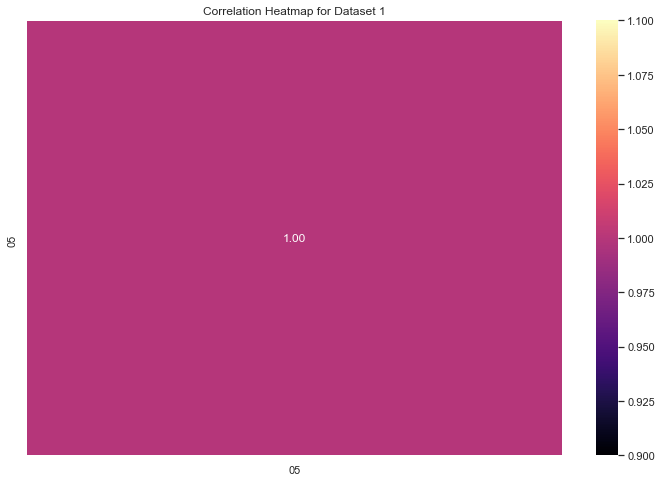

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your datasets
data1 = pd.read_csv(r'C:\Users\91957\Prathamesh Dataset\cleaned_dataset1.csv', delimiter=';')
data2 = pd.read_csv(r'C:\Users\91957\Prathamesh Dataset\cleaned_dataset2.csv', delimiter=';')

# For Dataset 1
correlation_matrix_data1 = data1.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_data1, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Dataset 1')
plt.show()


## Conclusion


The study conducts a detailed examination of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It investigates contributing factors to these accidents and their impact on fatalities. By identifying patterns and potential causal links, the research evaluates the effectiveness of traffic safety measures and trends in accidents and mortality. The ultimate objective is to propose strategies to reduce road accidents and their severity, thereby enhancing traffic safety and saving lives in North Rhine-Westphalia through informed and practical safety interventions.